In [103]:
!pip install vaderSentiment
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [104]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [105]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [106]:
user_account = ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [107]:
tweets = []
#
tweet_id = []
name = []
date_created = []
favorite_count = []
full_text = []

In [ ]:
for i in user_account:
    tweets = tweepy.Cursor(api.user_timeline, i, tweet_mode='extended').items(100)
    for j in tweets:
        tweet_id.append(j.id)
        name.append(j.author.name)
        date_created.append(j.created_at)
        favorite_count.append(j.favorite_count)
        full_text.append(j.full_text)
         

In [ ]:
df = pd.DataFrame({'Name' : name, 'Tweet ID' : tweet_id, 'Tweet Time' : date_created, 'Favorite Count': favorite_count, 'Tweet Text' : full_text})
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [ ]:
base_name = df.loc[0,'Name']
counter = 0 
for index, row in df.iterrows():
    if row['Name'] == base_name:
        df.loc[index,'Tweets Ago'] = counter
        counter +=1
    if row['Name'] != base_name:
        counter = 0
        df.loc[index,'Tweets Ago'] = counter
        base_name = row['Name']
        counter +=1

In [ ]:
for index, row in df.iterrows():
    tweet = row['Tweet Text']
    results = analyzer.polarity_scores(f'{tweet}')
    df.loc[index, 'Compound'] = results['compound']
    df.loc[index, 'Positive'] = results['pos']
    df.loc[index, 'Neutral'] = results['neu']
    df.loc[index, 'Negative'] = results['neg']

In [ ]:
x = df.iloc[0:100,5]

bbc_df = df['Name'] == 'BBC'
cnn_df = df['Name'] == 'CNN'
cbs_df = df['Name'] == 'CBS News'
fox_df = df['Name'] == 'Fox News'
nyt_df = df['Name'] == 'The New York Times'

bbc = df.loc[bbc_df]
cnn = df.loc[cnn_df]
cbs = df.loc[cbs_df]
fox = df.loc[fox_df]
nyt = df.loc[nyt_df]

bbc = bbc['Compound']
cnn = cnn['Compound']
cbs = cbs['Compound']
fox = fox['Compound']
nyt = nyt['Compound']

In [ ]:
plt.scatter(x,bbc, color = 'blue')
plt.scatter(x,cnn, color = 'green')
plt.scatter(x,cbs, color = 'orange')
plt.scatter(x,fox, color = 'red')
plt.scatter(x,nyt, color = 'purple')
plt.xticks(rotation = 45)
plt.title('Sentiment Analysis of Major Media Outlet Tweets')
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Score")
plt.grid(True)
plt.savefig('Fig1')

In [ ]:
polarity = df.groupby(['Name']).mean()["Compound"]
pd.DataFrame(polarity)

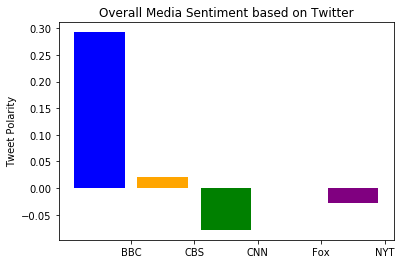

In [98]:
fig, ax = plt.subplots()
x = np.arange(len(polarity_mean))
bbc = ax.bar(x[0], polarity[0], color = 'blue')
cbs = ax.bar(x[1], polarity[1], color = 'orange')
cnn = ax.bar(x[2], polarity[2], color = 'green')
fox = ax.bar(x[3], polarity[3], color = 'red')
nyt = ax.bar(x[4], polarity[4], color = 'purple')
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.grid(False)
plt.savefig('Fig2')